In [4]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
    


In [6]:
df = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\American.csv')

In [4]:
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [6]:
df.columns


Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df.shape

(39981, 14)

In [10]:
df.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
County                      object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

In [11]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

if 'Price' in df.columns:
    df = df.dropna(subset=['Price'])

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna(df[non_numeric_cols].mode().iloc[0])

Missing values in each column:
Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64


In [12]:
df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110836.738001,36.435668,-98.080576
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47307.929921,4.446862,15.061145
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000,25.729830,-122.826870
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000,33.239850,-111.636310
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000,36.166620,-96.839680
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000,39.283090,-85.656980
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000,47.742370,-73.704510


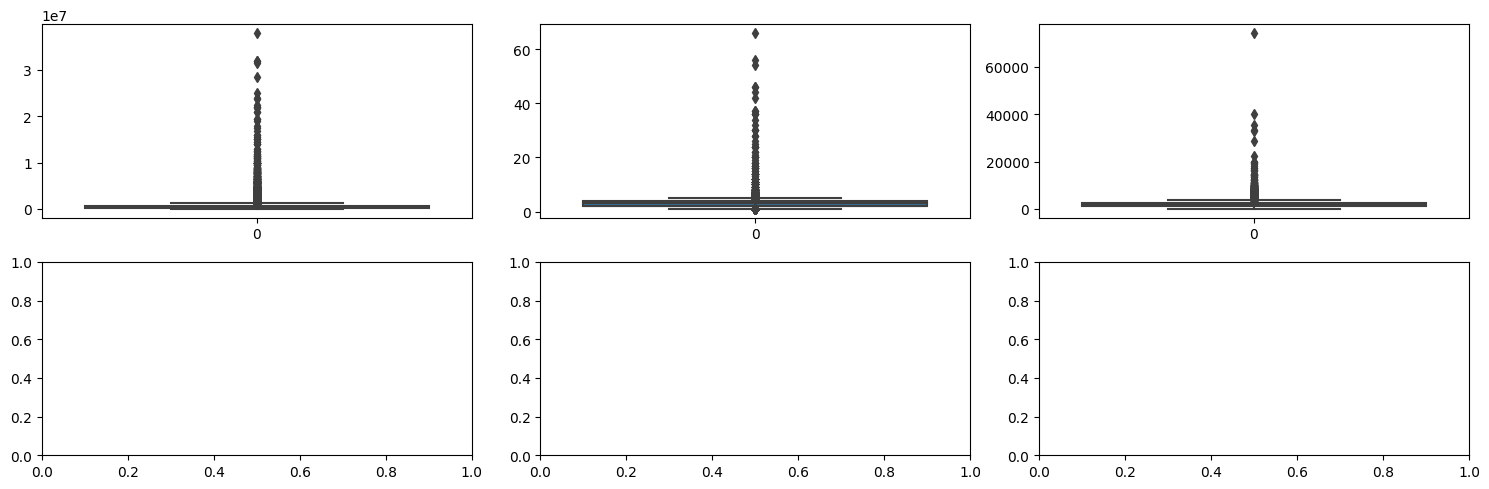

In [14]:
fig, axs=plt.subplots(2,3,figsize = (15,5))
plt1 = sns.boxplot(df['Price'],ax=axs[0,0])
plt2 = sns.boxplot(df['Beds'],ax=axs[0,1])
plt3 = sns.boxplot(df['Living Space'],ax=axs[0,2])
plt1 = sns.boxplot(df['Baths'],ax=axs[0,1])

plt.tight_layout()
plt.show()

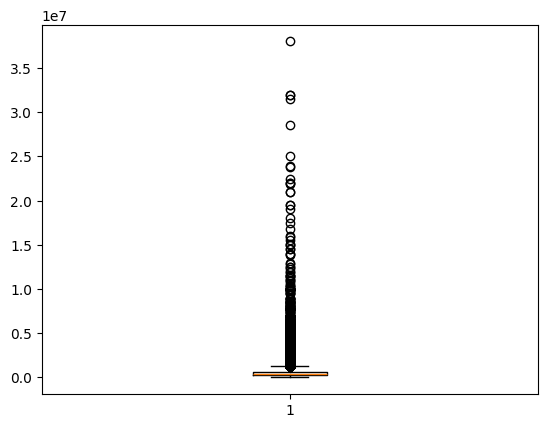

In [15]:
plt.boxplot(df.Price)
Q1=df.Price.quantile(0.25)
Q3=df.Price.quantile(0.75)
IQR=Q3-Q1
housing=df[(df.Price>=Q1-1.5*IQR)&(df.Price<+Q3+1.5*IQR)]

In [17]:
unique_cities = df['City'].unique()

print(unique_cities)

['New York' 'Staten Island' 'Bronx' 'Floral Park' 'Glen Oaks' 'Astoria'
 'Sunnyside' 'Long Island City' 'Brooklyn' 'Flushing' 'College Point'
 'Whitestone' 'Bayside' 'Little Neck' 'Oakland Gardens' 'Fresh Meadows'
 'Corona' 'East Elmhurst' 'Jackson Heights' 'Elmhurst' 'Rego Park'
 'Forest Hills' 'Woodside' 'Maspeth' 'Middle Village' 'Cambria Heights'
 'Springfield Gardens' 'Howard Beach' 'Kew Gardens' 'Ozone Park'
 'South Richmond Hill' 'South Ozone Park' 'Rosedale' 'Hollis' 'Bellerose'
 'Queens Village' 'Jamaica' 'Far Rockaway' 'Arverne' 'Rockaway Park'
 'Philadelphia' 'Washington' 'Baltimore' 'Towson' 'Gwynn Oak' 'Pikesville'
 'Essex' 'Dundalk' 'Curtis Bay' 'Catonsville' 'Parkville' 'Chesapeake'
 'Virginia Beach' 'Garner' 'Knightdale' 'Wake Forest' 'Raleigh' 'Durham'
 'Huntersville' 'Matthews' 'Charlotte' 'Atlanta' 'Ponte Vedra'
 'Jacksonville' 'Atlantic Beach' 'Jacksonville Beach' 'Saint Johns'
 'Miami Beach' 'Miami' 'Madison' 'Nashville' 'Cordova' 'Memphis'
 'Fisherville' 'Prospect

In [19]:
df=df.drop_duplicates()

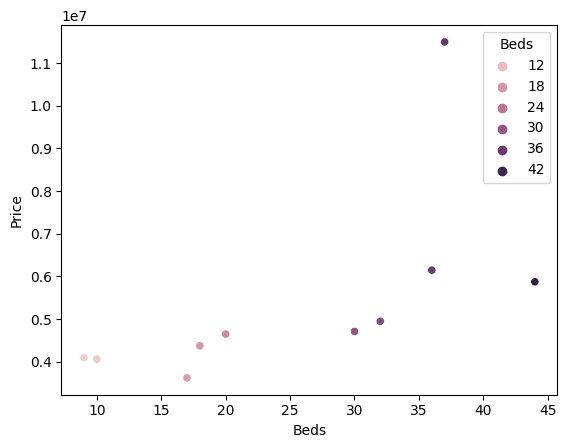

In [20]:
data = df.groupby('Beds')['Price'].mean().sort_values(ascending=False).reset_index().head(10)

# Plot using scatterplot
sns.scatterplot(data=data, x='Beds', y='Price', hue='Beds')

# Display the plot
plt.show()

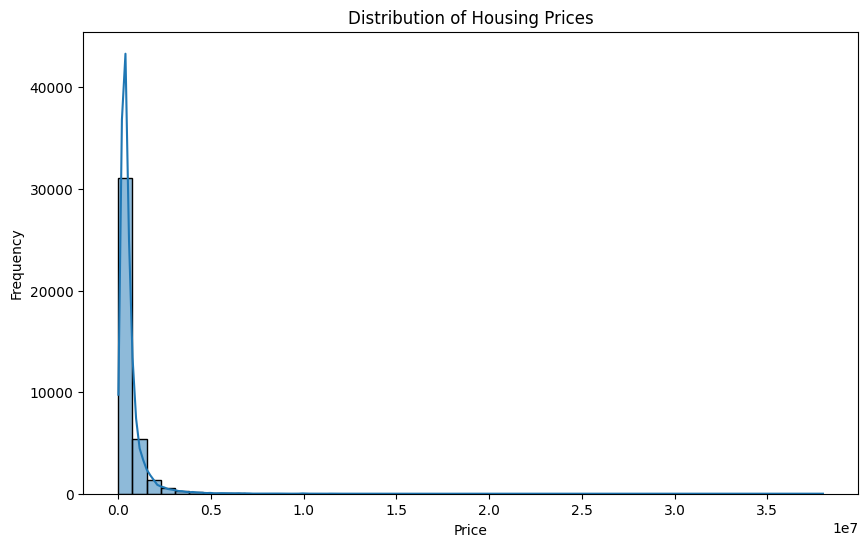

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

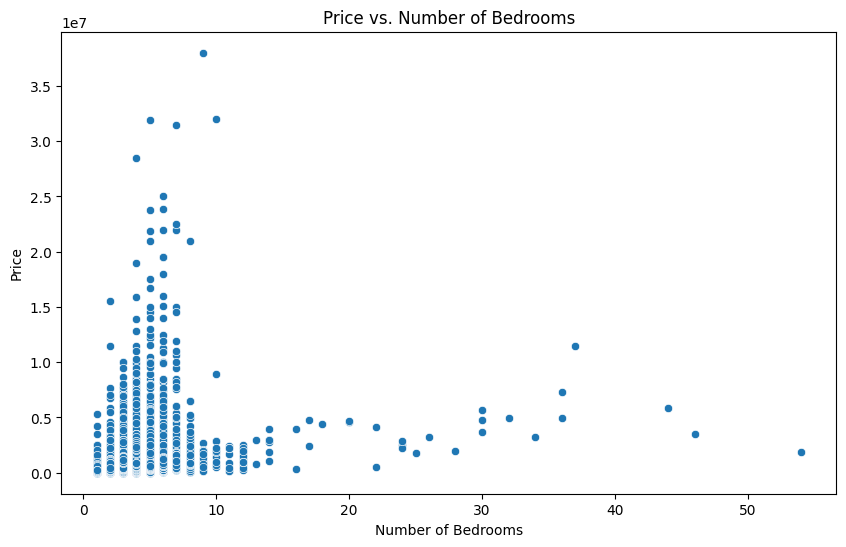

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Beds', y='Price')
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

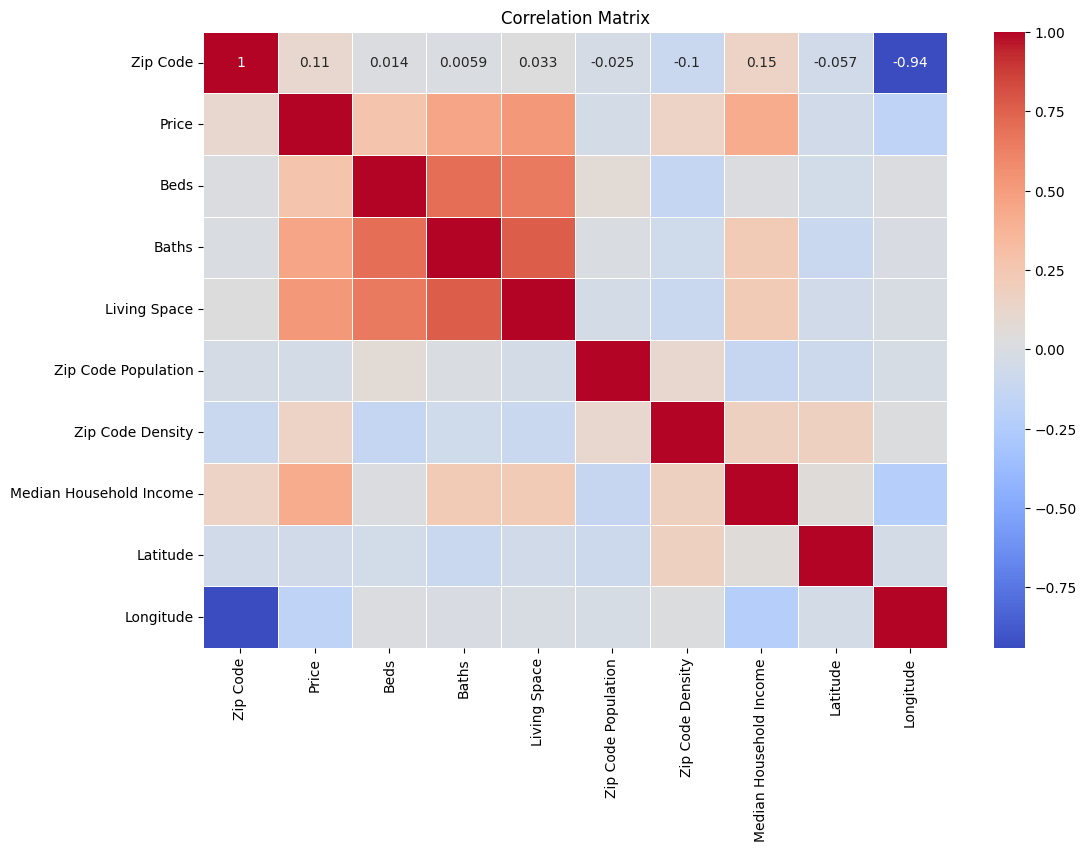

In [23]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

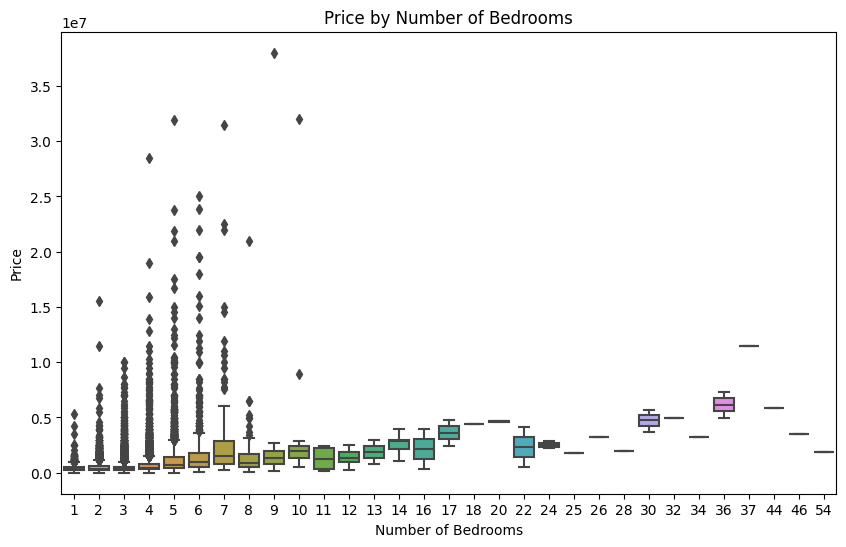

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Beds', y='Price')
plt.title('Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [29]:
if 'YearBuilt' in df.columns:
    df['HouseAge'] = 2024 - df['YearBuilt']
else:
    print("Column 'YearBuilt' not found. Adjust calculation of 'HouseAge' accordingly.")

# Example: Similarly, check for other dependent columns before processing
if 'Sqft' in df.columns:
    df['PricePerSqft'] = df['Price'] / df['Sqft']
else:
    print("Column 'Sqft' not found. Adjust calculation of 'PricePerSqft' accordingly.")

Column 'YearBuilt' not found. Adjust calculation of 'HouseAge' accordingly.
Column 'Sqft' not found. Adjust calculation of 'PricePerSqft' accordingly.


In [30]:
if 'Price' in df.columns:
    df = df.dropna(subset=['Price'])

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("Column names in DataFrame:")
print(df.columns)

Column names in DataFrame:
Index(['Zip Code', 'Price', 'Beds', 'Baths', 'Living Space', 'Address', 'City',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')


In [31]:
available_features = [col for col in ['Beds', 'Baths', 'Sqft', 'HouseAge', 'PricePerSqft'] if col in df.columns]
features = available_features
target = 'Price'

X = df[features]
y = df[target]

print("Selected features:")
print(X.head()) 


Selected features:
   Beds  Baths
0     2      3
2     1      1
3     3      2
4     1      1
5     1      1


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (31215, 2)
Testing set shape: (7804, 2)


In [7]:
 x = df.iloc[:, :-1]
y = df.iloc[:, -1]